## Exploratory Data Analysis

In [5]:
# read a json file and print its length
import json
import matplotlib.pyplot as plt
import numpy as np

import wandb 
import csv
import json
import pandas as pd

In [2]:
from loader import ContractNLIExample

In [3]:
CONTRADICTION = 0
ENTAILMENT = 1
NOT_MENTIONED = 2

In [9]:
def get_label(label):
    label = str(label)
    if label == "NLILabel.ENTAILMENT":
        return "ENTAILMENT"
    elif label == "NLILabel.CONTRADICTION":
        return "CONTRADICTION"
    elif label == "NLILabel.NOT_MENTIONED":
        return "NOT_MENTIONED"

In [25]:
def json_to_csv(json_file, csv_file):
    # Read the JSON file
    examples = ContractNLIExample.load(json.load(open(json_file, 'r', encoding='utf-8')))

    with open(csv_file, 'a+', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['concatenated_spans', 'hypothesis', 'num_spans', 'num_evidence_spans', 'num_tokens', 'label'])   # Write the header row

        # Iterate over each document
        for example in examples:
            doc_id = example.document_id  # Get the document ID
            spans = example.spans  # Get the 'spans' array
            num_spans = len(spans)  # Get the number of spans
            num_evidence_spans = len(example.annotated_spans)
            num_tokens = len(example.tokens)
            label = get_label(example.label)     # Get the 'label' object
            hypothesis = example.hypothesis_text  # Get the 'hypothesis' object
            annotated_spans = [spans[i] for i in example.annotated_spans]  # Get the 'annotations' object
            
            # check if label is 'not mentioned'
            if len(annotated_spans) == 0:
                # pick 3 random spans
                annotated_spans = [spans[i] for i in np.random.choice(len(spans), 3, replace=False)]

            context_text = example.context_text  # Get the 'context' object

            concatenated_spans = []
            concatenated_spans.append(
                "\n".join([context_text[start:end] for start, end in annotated_spans])
            )

            concatenated_spans = "\n\n".join(concatenated_spans)

            writer.writerow([concatenated_spans, hypothesis, num_spans, num_evidence_spans, num_tokens, label])  # Write the row to the CSV file

    print(f"Conversion complete. CSV file '{csv_file}' created.")

In [26]:
json_folder = "../dataset/contract-nli"
csv_folder = "../dataset/csv/eda"

In [28]:
# json_to_csv(f'{json_folder}/train.json', f'{csv_folder}/all.csv')
# json_to_csv(f'{json_folder}/dev.json', f'{csv_folder}/all.csv')
# json_to_csv(f'{json_folder}/test.json', f'{csv_folder}/all.csv')

df = pd.read_csv(f'{csv_folder}/all.csv')

100%|██████████| 423/423 [00:28<00:00, 15.03it/s]


Conversion complete. CSV file '../dataset/csv/eda/all.csv' created.


100%|██████████| 61/61 [00:04<00:00, 14.10it/s]


Conversion complete. CSV file '../dataset/csv/eda/all.csv' created.


100%|██████████| 123/123 [00:08<00:00, 14.90it/s]


Conversion complete. CSV file '../dataset/csv/eda/all.csv' created.


In [30]:
# drop rows where label is 'label'
df = df[df.label != 'label']

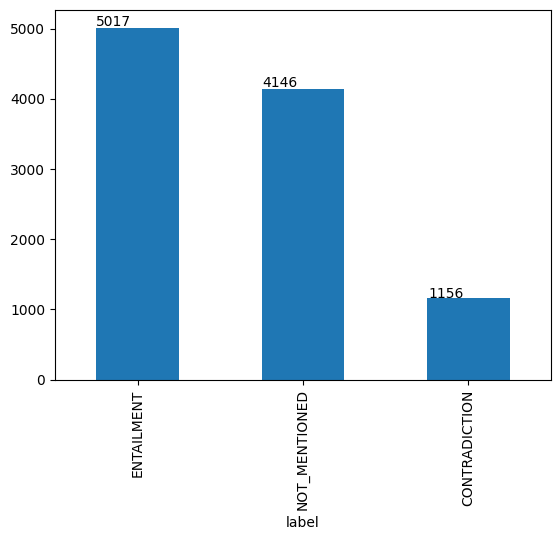

In [31]:
# make a bar plot with numbers on top
ax = df['label'].value_counts().plot(kind='bar')

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

count    10319.000000
mean      1738.553542
std       1062.788261
min         74.000000
25%        988.000000
50%       1536.000000
75%       2164.000000
max       8575.000000
Name: num_tokens, dtype: float64


Text(0.5, 1.0, 'Distribution of Number of Tokens')

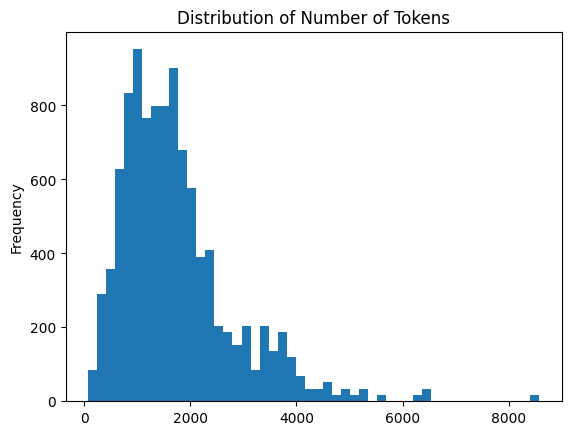

In [ ]:
# convert number of tokens to numeric
df['num_tokens'] = pd.to_numeric(df['num_tokens'])

# print summary statistics
print(df['num_tokens'].describe())

# plot histogram of number of tokens
df['num_tokens'].plot.hist(bins=50)
plt.title('Distribution of Number of Tokens')


count    10319.000000
mean        79.172982
std         42.685240
min         13.000000
25%         50.000000
50%         71.000000
75%         98.000000
max        354.000000
Name: num_spans, dtype: float64


Text(0.5, 1.0, 'Distribution of Number of Spans')

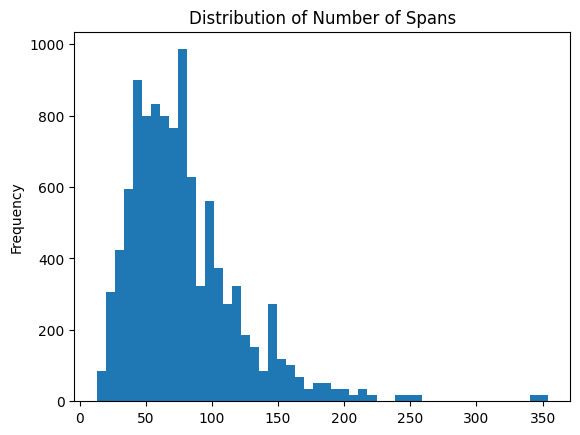

In [41]:
# convert number of tokens to numeric
df['num_spans'] = pd.to_numeric(df['num_spans'])

# print summary statistics
print(df['num_spans'].describe())

# plot histogram of number of tokens and give title
df['num_spans'].plot.hist(bins=50)
plt.title('Distribution of Number of Spans')


count    10319.000000
mean         1.160287
std          1.464343
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         32.000000
Name: num_evidence_spans, dtype: float64
median = 1.0


Text(0.5, 1.0, 'Distribution of Number of Evidence Spans')

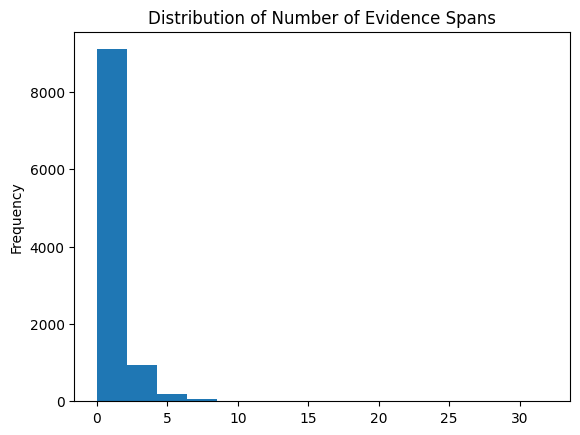

In [69]:
# convert number of tokens to numeric
df['num_evidence_spans'] = pd.to_numeric(df['num_evidence_spans'])

# print summary statistics
print(df['num_evidence_spans'].describe())
print(f"median = {np.median(df['num_evidence_spans'])}")

# plot histogram of number of tokens and give title
df['num_evidence_spans'].plot.hist(bins=15)
plt.title('Distribution of Number of Evidence Spans')


count    10319.000000
mean       459.097975
std        316.014851
min          5.000000
25%        245.000000
50%        382.000000
75%        580.000000
max       3116.000000
Name: concatenated_spans, dtype: float64
fit = 9712, not_fit = 607
percentage of spans that fit = 94.12%


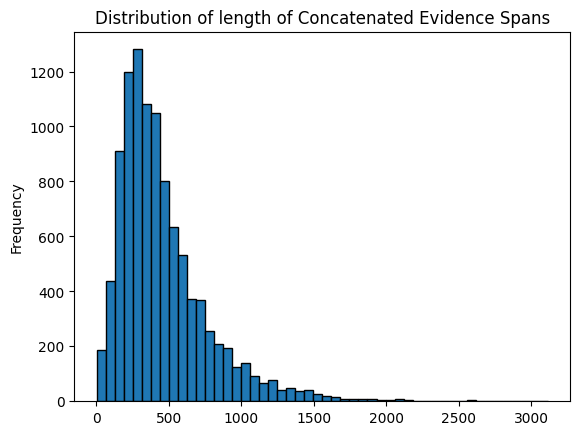

<Axes: >

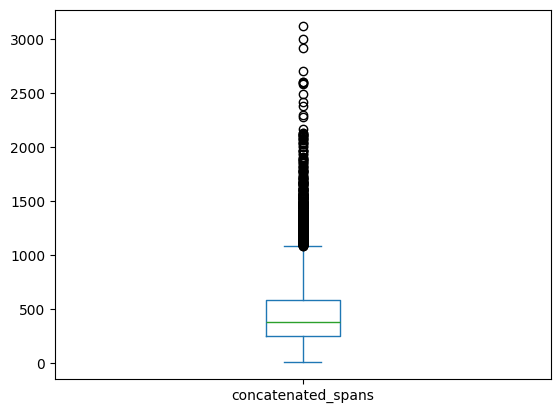

In [68]:
# convert number of tokens to numeric
len_concatenated_spans = df['concatenated_spans'].apply(lambda x: len(x))

# print summary statistics
print(len_concatenated_spans.describe())

fit = len_concatenated_spans[len_concatenated_spans < 1024].count()
not_fit = len_concatenated_spans[len_concatenated_spans >= 1024].count()

# get the number of spans that are less than 1024
print(f"fit = {fit}, not_fit = {not_fit}")
print(f"percentage of spans that fit = {fit / (fit + not_fit) * 100:.2f}%")



# plot histogram of number of tokens and give title
len_concatenated_spans.plot.hist(bins=50, edgecolor='black')
plt.title('Distribution of length of Concatenated Evidence Spans')
plt.show()

# draw a boxplot for the same
len_concatenated_spans.plot.box()

In [4]:
examples = ContractNLIExample.load(data)

100%|██████████| 423/423 [00:42<00:00,  9.99it/s]


In [5]:
examples_dev = ContractNLIExample.load(json.load(open('../dataset/contract-nli/dev.json', 'r')))
examples_test = ContractNLIExample.load(json.load(open('../dataset/contract-nli/test.json', 'r')))

all_examples = examples + examples_dev + examples_test

100%|██████████| 123/123 [00:26<00:00,  4.63it/s]


In [7]:
from random import randint

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# pick a random example
e_idx = randint(0, len(examples))
# e_idx = 2191

e = examples[e_idx]
print(e_idx)

print(
    e.data_id,
    e.document_id,
    f"Hyp id: {e.hypothesis_id}",
    f"hyp symbol: {e.hypothesis_symbol}",
    # e.file_name,
    f"hyp text: {e.hypothesis_text}",
    f"hyp tokens: {e.hypothesis_tokens}",
    f"context text: {e.context_text}",
    f"tokens: {e.tokens}",
    # Note that splits are NOT unique
    f"splits: {e.splits}",
    f"spans: {e.spans}",
    # f": {e.char_to_word_offset}",
    f"label: {e.label}",
    f"annotated spans: {e.annotated_spans}",
    sep='\n'
)

466
116_nda-12
116
Hyp id: nda-12
hyp symbol: [nda-12]
hyp text: Receiving Party may independently develop information similar to Confidential Information.
hyp tokens: ['Receiving', 'Party', 'may', 'independently', 'develop', 'information', 'similar', 'to', 'Confidential', 'Information.']
context text: Non-Disclosure Agreement
between the company
– in the following referred to as “the company”
and
Furtwangen University
represented by its President:
represented by the Dean:
– in the following referred to as “the university” –
Furtwangen University student is planning to complete their thesis with the company; the thesis topic includes practical applications within the company. In order to work on this topic as well as to supervise and evaluate the work, the contracting parties may have to share and exchange confidential information regarding their institutions. For the contracting parties’ protection, such information shall be subject to confidentiality. This agreement is exclusively co

In [14]:
print('\n\n---'.join([e.context_text[start: end] for start, end in e.spans]))

Non-Disclosure 

---Agreement

---This Agreement is made as of the ___day of _______, 20_____ (“Effective Date”) by and between 

---________________________________, having offices at 

---____________________ and Carnegie Mellon University, having offices at 5000 Forbes Avenue, Pittsburgh, PA 15213 (“Carnegie Mellon”).

---WHEREAS, for the purpose of furthering a potential research relationship between them, 

---________________________ and Carnegie Mellon (collectively referred to as the “Parties,” and each individually referred to as a “Party”) have determined to establish terms governing the use and protection of certain Confidential Information (as defined below) that one Party (“Disclosing Party”) may disclose to the other Party (“Recipient”), which information in the case of 

---____________________________ 

---relates generally to 

---______________________________ 

---and in the case of Carnegie Mellon relates generally to 

---___________________________.

---NOW THEREF

{1: 2886, 2: 2069, 3: 651, 4: 283, 5: 122, 6: 73, 7: 38, 8: 20, 9: 7}
spans 1.9 1.2


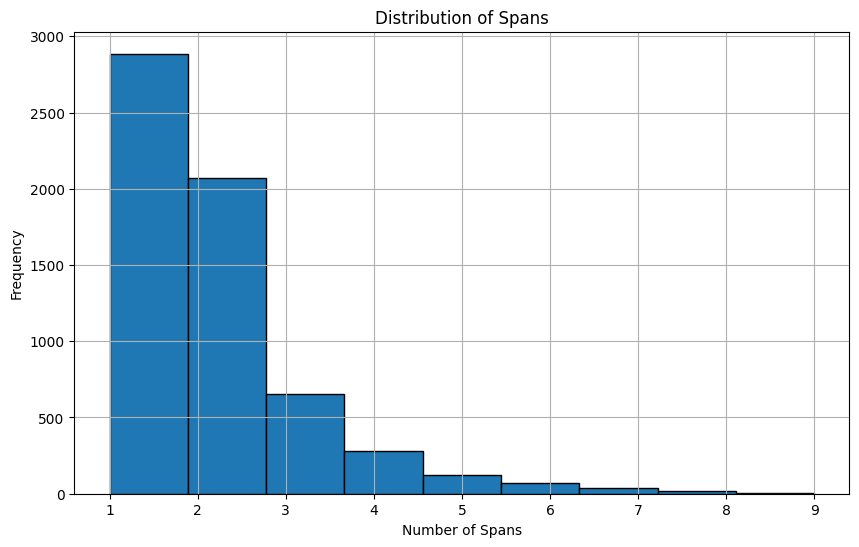

In [79]:
an_spans = np.array(
    [
        len(e.annotated_spans)
        for e in all_examples
        if e.label.name != "NOT_MENTIONED" and len(e.annotated_spans) < 10
    ]
)

# get value counts
unique, counts = np.unique(an_spans, return_counts=True)
print(dict(zip(unique, counts)))


# Calculate and print mean and standard deviation of spans
mean_spans = np.mean(an_spans)
std_spans = np.std(an_spans)
print("spans", round(mean_spans, 1), round(std_spans, 1))

# Plot histogram of spans
plt.figure(figsize=(10, 6))
plt.hist(an_spans, bins=9, edgecolor="black")
plt.title("Distribution of Spans")
plt.xlabel("Number of Spans")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [73]:
for e in all_examples[:10]:
    if e.label.name != "NOT_MENTIONED":
        print(
            # e.tokens,
            e.spans,
            e.annotated_spans,
            sep="\n",
        )
        print()

[[0, 44], [45, 132], [133, 331], [332, 417], [417, 486], [486, 535], [535, 581], [582, 691], [692, 700], [701, 963], [964, 1098], [1099, 1107], [1107, 1247], [1248, 1293], [1294, 1683], [1684, 1878], [1879, 1883], [1883, 2120], [2121, 2125], [2125, 2228], [2229, 2471], [2472, 2478], [2478, 2541], [2542, 2980], [2981, 3141], [3142, 3225], [3226, 3364], [3365, 3369], [3369, 3829], [3830, 3834], [3834, 3924], [3924, 4124], [4124, 4219], [4219, 4263], [4263, 4364], [4365, 4369], [4369, 4656], [4657, 4833], [4834, 5020], [5021, 5179], [5179, 5347], [5347, 5398], [5399, 5733], [5734, 5875], [5876, 5959], [5959, 6301], [6302, 6729], [6729, 6802], [6802, 6935], [6935, 7096], [7097, 7291], [7292, 7645], [7646, 7855], [7856, 8098], [8099, 8281], [8282, 8433], [8434, 8494], [8495, 8520], [8520, 8544], [8545, 8546], [8546, 8557], [8558, 8571], [8572, 8573], [8573, 8579], [8579, 8584]]
[39, 40]

[[0, 44], [45, 132], [133, 331], [332, 417], [417, 486], [486, 535], [535, 581], [582, 691], [692, 700],

In [6]:
print(set([e.label for e in all_examples]))

{<NLILabel.ENTAILMENT: 1>, <NLILabel.NOT_MENTIONED: 0>, <NLILabel.CONTRADICTION: 2>}


In [55]:
spans = [len(example.spans) for example in all_examples]
spans = sorted(spans)

tokens = [len(example.tokens) for example in all_examples]
tokens = sorted(tokens)

spans 79.2 42.7


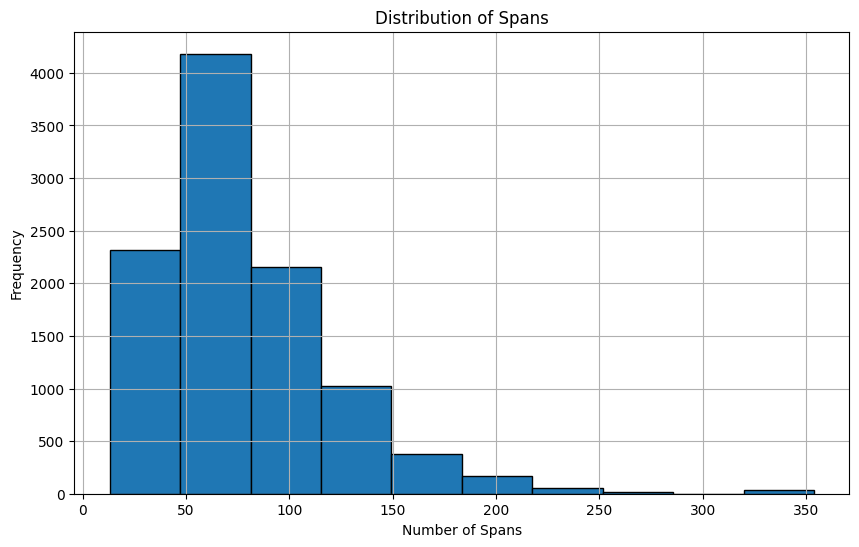

In [58]:
# Calculate and print mean and standard deviation of spans
mean_spans = np.mean(spans)
std_spans = np.std(spans)
print('spans', round(mean_spans, 1), round(std_spans, 1))

# Plot histogram of spans
plt.figure(figsize=(10, 6))
plt.hist(spans, bins=10, edgecolor='black')
plt.title('Distribution of Spans')
plt.xlabel('Number of Spans')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

tokens 1738.6 1062.7


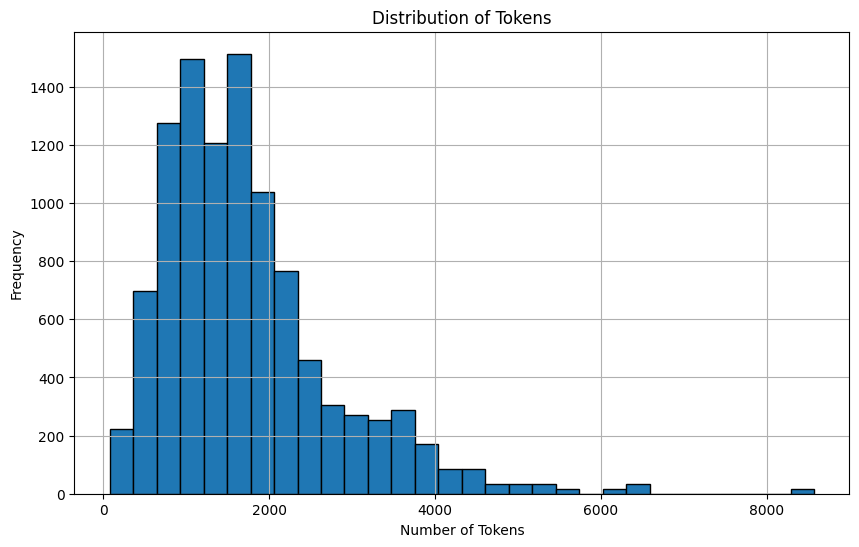

In [82]:
# Calculate and print mean and standard deviation of tokens
mean_tokens = np.mean(tokens)
std_tokens = np.std(tokens)
print('tokens', round(mean_tokens, 1), round(std_tokens, 1))

# Plot histogram of tokens
plt.figure(figsize=(10, 6))
plt.hist(tokens, bins=30, edgecolor='black')
plt.title('Distribution of Tokens')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
import pandas as pd

In [11]:
data = [(int(example.hypothesis_id.split('-')[1]), example.label.name) for example in all_examples]

In [12]:
df = pd.DataFrame(data, columns=['x', 'y'])
df.head()

,x,y
0,11,NOT_MENTIONED
1,16,ENTAILMENT
2,15,ENTAILMENT
3,10,ENTAILMENT
4,2,NOT_MENTIONED


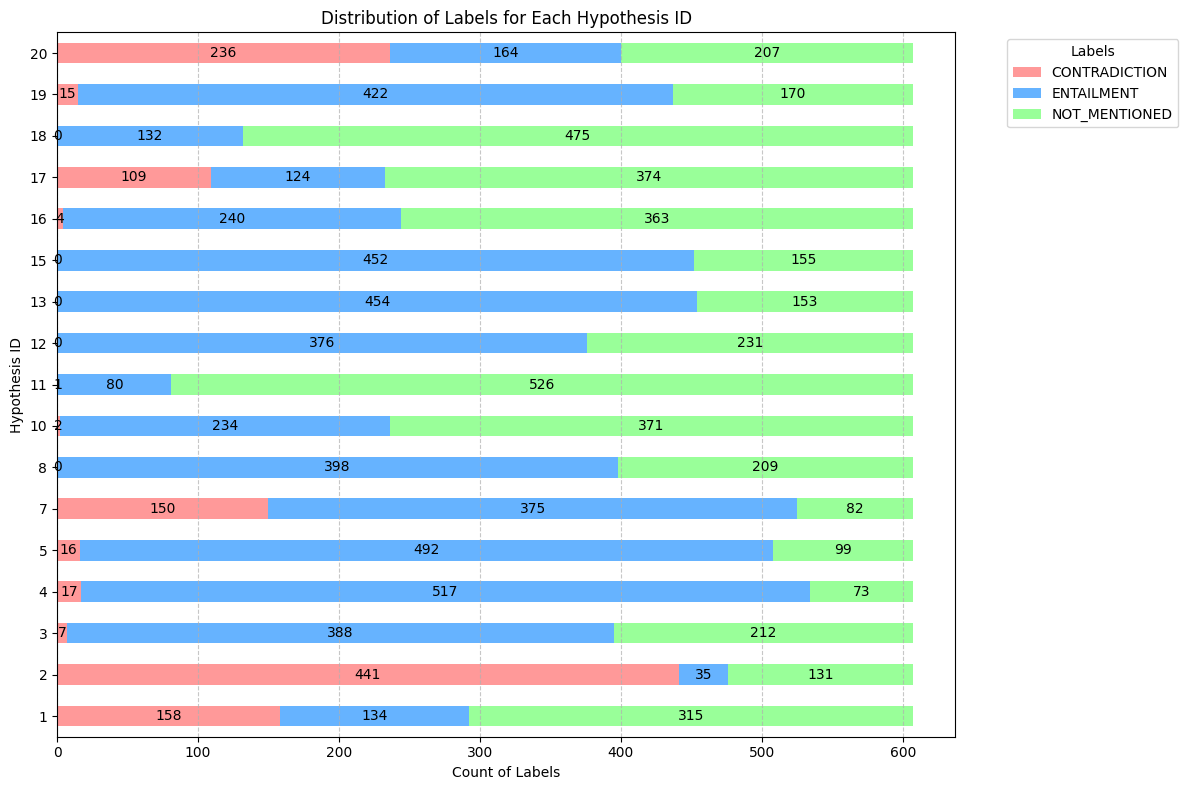

In [19]:
# Count occurrences of each (x, y) pair
count_df = df.groupby(['x', 'y']).size().unstack(fill_value=0)

# Plot transposed (horizontal) stacked bar chart
ax = count_df.plot(kind='barh', stacked=True, figsize=(12, 8), color=['#ff9999','#66b3ff','#99ff99'])

# Add labels and title
plt.ylabel('Hypothesis ID')
plt.xlabel('Count of Labels')
plt.title('Distribution of Labels for Each Hypothesis ID')

# Add legend
plt.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add labels to show counts of each section of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Show plot
plt.tight_layout()
plt.show()

In [60]:
# Calculate the number of paragraphs, spans, and tokens per document
num_paragraphs = [len(example.context_text.split('\n')) for example in all_examples]
num_spans = [len(example.spans) for example in all_examples]
num_tokens = [len(example.tokens) for example in all_examples]

# Calculate average, min, and max for paragraphs, spans, and tokens
avg_paragraphs = round(np.mean(num_paragraphs), )
min_paragraphs = np.min(num_paragraphs)
max_paragraphs = np.max(num_paragraphs)

avg_spans = round(np.mean(num_spans), )
min_spans = np.min(num_spans)
max_spans = np.max(num_spans)

avg_tokens = round(np.mean(num_tokens), )
min_tokens = np.min(num_tokens)
max_tokens = np.max(num_tokens)

# Create a DataFrame to display the results as a table
stats_df = pd.DataFrame({
    'Metric': ['Paragraphs', 'Spans', 'Tokens'],
    'Average': [avg_paragraphs, avg_spans, avg_tokens],
    'Min': [min_paragraphs, min_spans, min_tokens],
    'Max': [max_paragraphs, max_spans, max_tokens]
})

# Print the table
print(stats_df)

       Metric  Average  Min   Max
0  Paragraphs       45    9   248
1       Spans       79   13   354
2      Tokens     1739   74  8575


In [81]:
# Calculate tokens per instance for paragraphs and spans
tokens_per_paragraph = [tokens[i] / num_paragraphs[i] for i in range(len(tokens))]
tokens_per_span = [tokens[i] / num_spans[i] for i in range(len(tokens))]

# Calculate average, min, and max for tokens per instance for paragraphs
avg_tokens_per_paragraph = round(np.mean(tokens_per_paragraph), 1)
min_tokens_per_paragraph = round(np.min(tokens_per_paragraph), 1)
max_tokens_per_paragraph = round(np.max(tokens_per_paragraph), 1)

# Calculate average, min, and max for tokens per instance for spans
avg_tokens_per_span = round(np.mean(tokens_per_span), 1)
min_tokens_per_span = round(np.min(tokens_per_span), 1)
max_tokens_per_span = round(np.max(tokens_per_span), 1)

# Create a DataFrame to display the tokens per instance statistics
tokens_stats_df = pd.DataFrame({
    'Metric': ['Tokens per Paragraph', 'Tokens per Span'],
    'Average': [avg_tokens_per_paragraph, avg_tokens_per_span],
    'Min': [min_tokens_per_paragraph, min_tokens_per_span],
    'Max': [max_tokens_per_paragraph, max_tokens_per_span]
})

# Print the table
print(tokens_stats_df)


                 Metric  Average  Min    Max
0  Tokens per Paragraph     50.2  1.3  416.3
1       Tokens per Span     27.9  0.9  285.7
